In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df=pd.read_csv('Classified Data')

In [12]:
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [13]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [14]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [19]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()

In [23]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [24]:
scaler_Features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [26]:
X = pd.DataFrame(scaler_Features,columns=df.columns[:-1])

In [27]:
X.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [28]:
Y=df['TARGET CLASS']

In [29]:
Y.head()

0    1
1    0
2    0
3    1
4    1
Name: TARGET CLASS, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split

In [41]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [33]:
X_train.shape

(700, 10)

In [34]:
from sklearn.neighbors import KNeighborsClassifier 

In [65]:
knn = KNeighborsClassifier(n_neighbors=30)

In [66]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform')

In [67]:
ypred = knn.predict(X_test)

In [68]:
np.mean(Y_test != ypred)

0.06

In [60]:
error_rate=[]
for i in range(1,41):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    ypred = knn.predict(X_test)
    error_rate.append(np.mean(Y_test != ypred))
    

In [61]:
error_rate

[0.07,
 0.08666666666666667,
 0.07666666666666666,
 0.07,
 0.08333333333333333,
 0.07666666666666666,
 0.07,
 0.06333333333333334,
 0.07333333333333333,
 0.06666666666666667,
 0.07,
 0.06333333333333334,
 0.07333333333333333,
 0.07333333333333333,
 0.07333333333333333,
 0.06666666666666667,
 0.07666666666666666,
 0.06666666666666667,
 0.08,
 0.07666666666666666,
 0.07,
 0.07333333333333333,
 0.07333333333333333,
 0.07333333333333333,
 0.08333333333333333,
 0.07666666666666666,
 0.07333333333333333,
 0.07,
 0.06333333333333334,
 0.06,
 0.06666666666666667,
 0.06333333333333334,
 0.07,
 0.06333333333333334,
 0.06666666666666667,
 0.07,
 0.06666666666666667,
 0.06666666666666667,
 0.07333333333333333,
 0.07333333333333333]

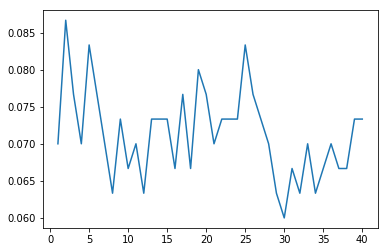

In [64]:
plt.plot(range(1,41),error_rate)

In [69]:
from sklearn.metrics import confusion_matrix

In [70]:
confusion_matrix(Y_test, ypred)

array([[134,  12],
       [  6, 148]], dtype=int64)